## Intro to Neural Nets : Self-learning
### Abstract
The purpose of this notebook is to learn the basics of how neural networks work.
I will be working through Packt's *Machine Learning with Pytorch and Scikit-learn*,
starting with chapter 2's introduction to building simple discrete neurons, to chapter
11's exercise on building a multilayer perceptron to classify handwritten characters
in the MNIST dataset.

*(additionally, I feel I need to review my linear algebra, so rather than leverage numpy I will instead be writing my own linear algebra function in pure python)*

### Part 1: Building a neuron 
At it's most basic, an artificial neuron consists of three main components: weights; a bias; and an activation function.
- **weights:** Each neuron has one or more inputs. Each of these inputs is multiplied by a weight that determines how much and in what direction each of these inputs should affect the neuron's output. After the inputs have been weighed, they are then summed.
- **bias :** After the sum of weighed inputs has been computed, an additional value (+ or -) that is added to that sum.  This value makes it easier or harder for this neuron to turn on, effectively biassing it towards one state or another.
- **activation function:** Because the weights and biases are unbound, the sum of the biases and weighed inputs is also unbound in both directions -- this is unwanted.  The activation function is a final step that conditions the sum in such a manner that it is bound to be no less than 0 and possibly no more than 1 depending on the exact activation function used

First we need to be able to instantiate a neuron with those 3 basic components:

In [7]:
from typing import Callable

class neuron():
    def __init__(self, weights: list[float], bias: float, activation_function: Callable[float,float]):
        self.weights = weights
        self.bias  = bias
        self.activation_function = activation_function

88 88
121.0


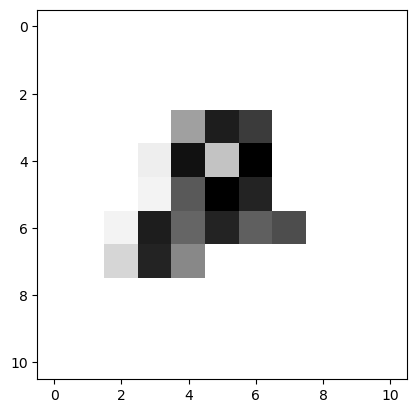

In [95]:
training_folder = int_folders[2] + '\\train*'
images = glob(training_folder + '\\*')

from imageio.v3 import imread
import matplotlib.pyplot as plt
from skimage.measure import block_reduce

for image in images:
    img = imread(image)[20:108,20:108,0]
    #plt.imshow(img, cmap='gray')
    #plt.show()
    print(len(img),len(img[0]))
    print(len(img) * len(img[0]) / 8/8)

    imshow(block_reduce(img,(8,8)), cmap='gray')
    break






#### MLP with 1 hidden layer

Initial layer: 121 neurons\
hidden layer: 50 neurons\
output layer: 10 neurons

In [ ]:

len_Ai = 121
len_Ah1= 50
len_A0 = 10

